In [8]:
import pandas as pd

In [9]:
dataset = pd.read_csv('./Mall_Customers.csv')
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


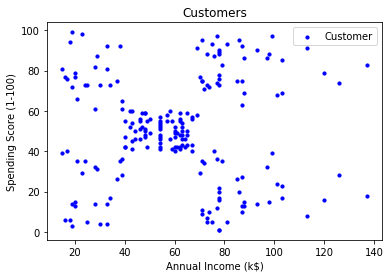

In [10]:
X = dataset.iloc[:,[3,4]].values
import matplotlib.pyplot as plt #Data Visualization 

plt.scatter(X[:, 0], X[:, 1], s = 10, c = 'blue', label = 'Customer')
plt.title('Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

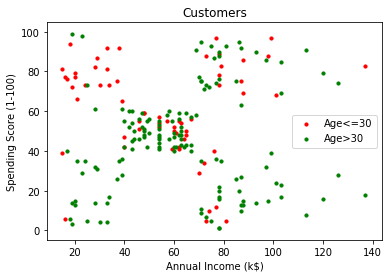

In [11]:
import matplotlib.pyplot as plt #Data Visualization 

X_young = dataset[dataset['Age']<=30].iloc[:, [3,4]].values
X_handsome = dataset[(dataset['Age']>30)].iloc[:, [3,4]].values

plt.scatter(X_young[:, 0], X_young[:, 1], s = 10, c = 'red', label = 'Age<=30')
plt.scatter(X_handsome[:, 0], X_handsome[:, 1], s = 10, c = 'green', label = 'Age>30')

plt.title('Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

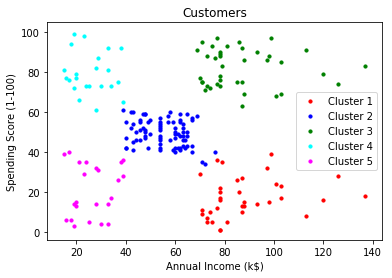

In [14]:
from sklearn.cluster import KMeans

X= dataset.iloc[:, [3,4]].values
# 调用sklearn的KMeans方法
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)

y_kmeans= kmeansmodel.fit_predict(X)

# 将聚类结果可视化在坐标系上
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'red', label = 'Target')

#plt.scatter(X[y_kmeans != 2, 0], X[y_kmeans != 2, 1], s = 10, c = 'green', label = 'Non-Target')


#plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], 
#            s = 60, c = 'orange', label = 'Centroids')
plt.title('Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:
label_pred = kmeansmodel.labels_ #获取聚类标签
print(label_pred)

centroids = kmeansmodel.cluster_centers_ #获取聚类中心
print(centroids)

inertia = kmeansmodel.inertia_ # 获取聚类准则的总和
print(inertia)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
44448.45544793371


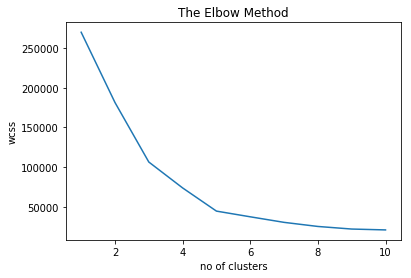

In [12]:
# KMeans++使用Elbow方法
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, 
                    init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [17]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=5,
                      n_init=10, max_no_improvement=10)

y_kmeans= mbk.fit_predict(X)

label_pred = mbk.labels_ #获取聚类标签
print(label_pred)

centroids = mbk.cluster_centers_ #获取聚类中心
print(centroids)

inertia = mbk.inertia_ # 获取聚类准则的总和
print(inertia)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[54.11459754 49.63437926]
 [86.66666667 81.8173913 ]
 [86.79104478 16.70149254]
 [25.6969697  20.04040404]
 [26.33862434 78.39153439]]
44633.87659576645


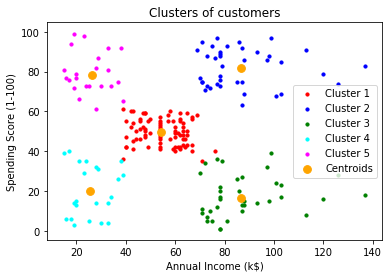

In [18]:
# 将聚类结果可视化在坐标系上
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], 
            s = 60, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()